In [ ]:
#Project 5: Crop Yield Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('crop_yield.csv')
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [3]:
df.isnull().any()

Crop               False
Crop_Year          False
Season             False
State              False
Area               False
Production         False
Annual_Rainfall    False
Fertilizer         False
Pesticide          False
Yield              False
dtype: bool

In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19684    False
19685    False
19686    False
19687    False
19688    False
Length: 19689, dtype: bool

In [5]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

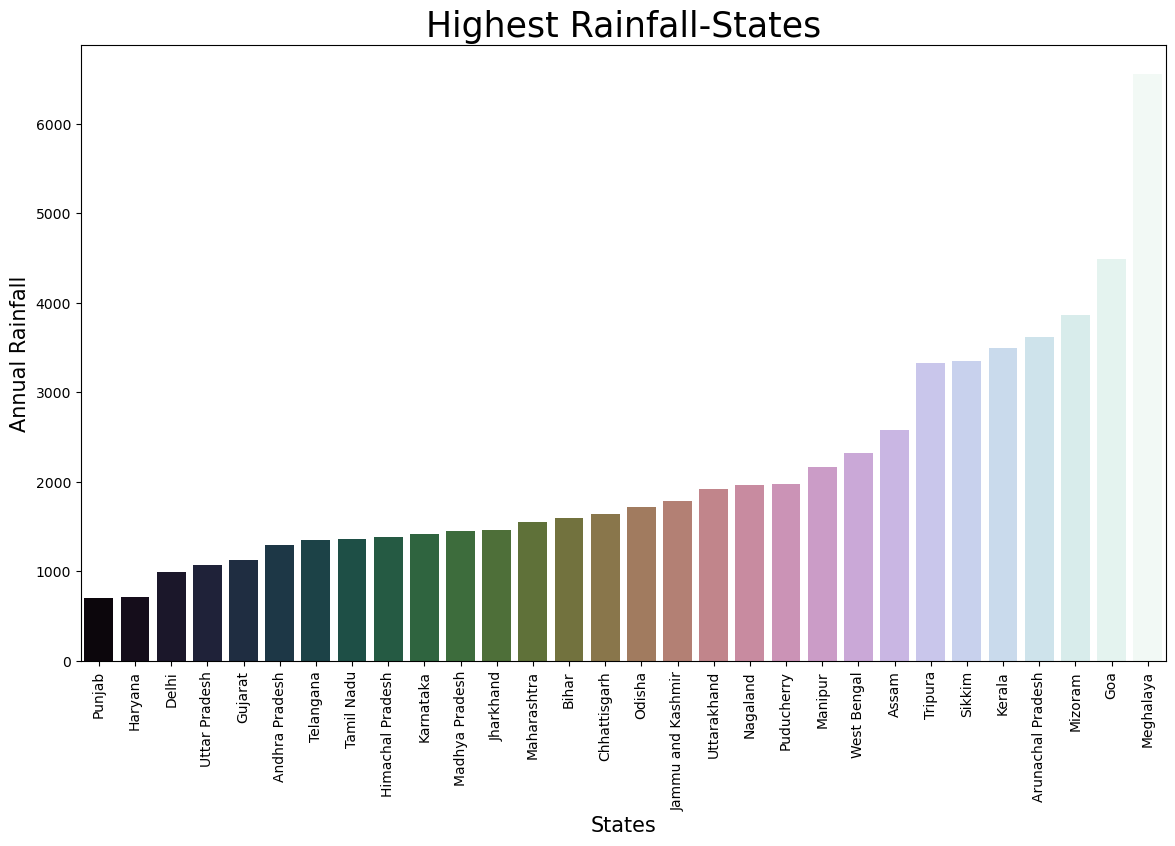

In [37]:
# Question 1. Which state gets the highest annual rainfall ?

rain=df.groupby('State')['Annual_Rainfall'].max().reset_index()
rainfall=rain.sort_values(by='Annual_Rainfall',ascending=True)
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Annual_Rainfall' ,data=rainfall, palette='cubehelix')
plt.title('Highest Rainfall-States',fontsize=25)
plt.xlabel('States',fontsize=15)
plt.ylabel('Annual Rainfall',fontsize=15)
plt.xticks(rotation=90)
plt.show()

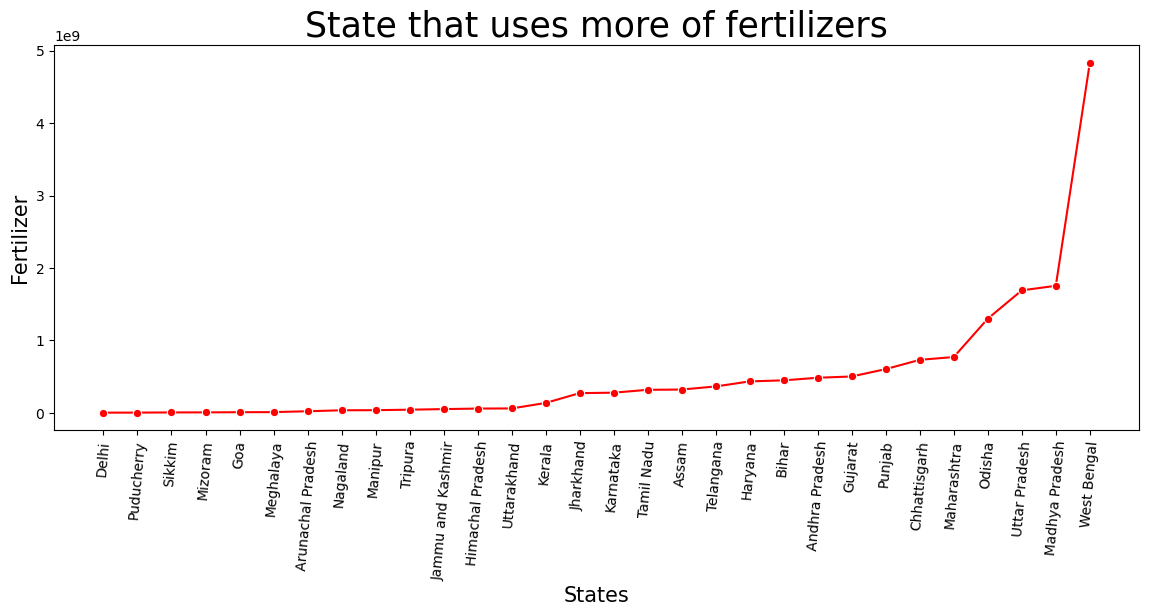

In [805]:
# Question 2. Which state uses more fertilizer ?

f=df.groupby('State')['Fertilizer'].max().reset_index()
fertilizer=f.sort_values(by='Fertilizer',ascending=True)
plt.figure(figsize=(14,5 ))
sns.lineplot(x='State', y='Fertilizer' ,data=fertilizer, color='red',marker='o')
plt.title('State that uses more of fertilizers',fontsize=25)
plt.xlabel('States',fontsize=15)
plt.ylabel('Fertilizer',fontsize=15)
plt.xticks(rotation=85)
plt.show()

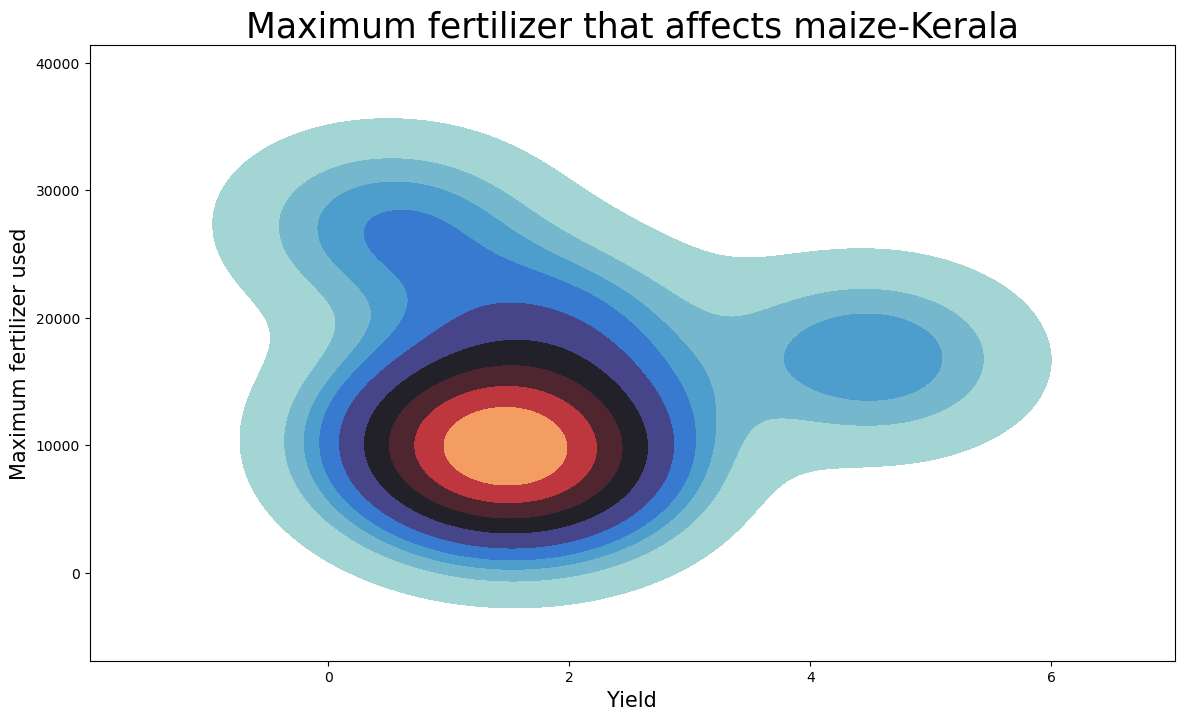

In [803]:
# Question 3. Highest fertillizer that affect the crop Maize and its yield in Kerala ?

a =df.query("Crop=='Maize' and State=='Kerala'")
b=a.groupby('Yield')['Fertilizer'].max().reset_index()
c=b.sort_values(by='Fertilizer',ascending=True)
plt.figure(figsize=(14,8))
sns.kdeplot(x='Yield', y='Fertilizer', data=c ,cmap='icefire', shade=True)
plt.title('Maximum fertilizer that affects maize-Kerala', fontsize=25)
plt.xlabel('Yield', fontsize=15)
plt.ylabel('Maximum fertilizer used', fontsize=15)
plt.show()

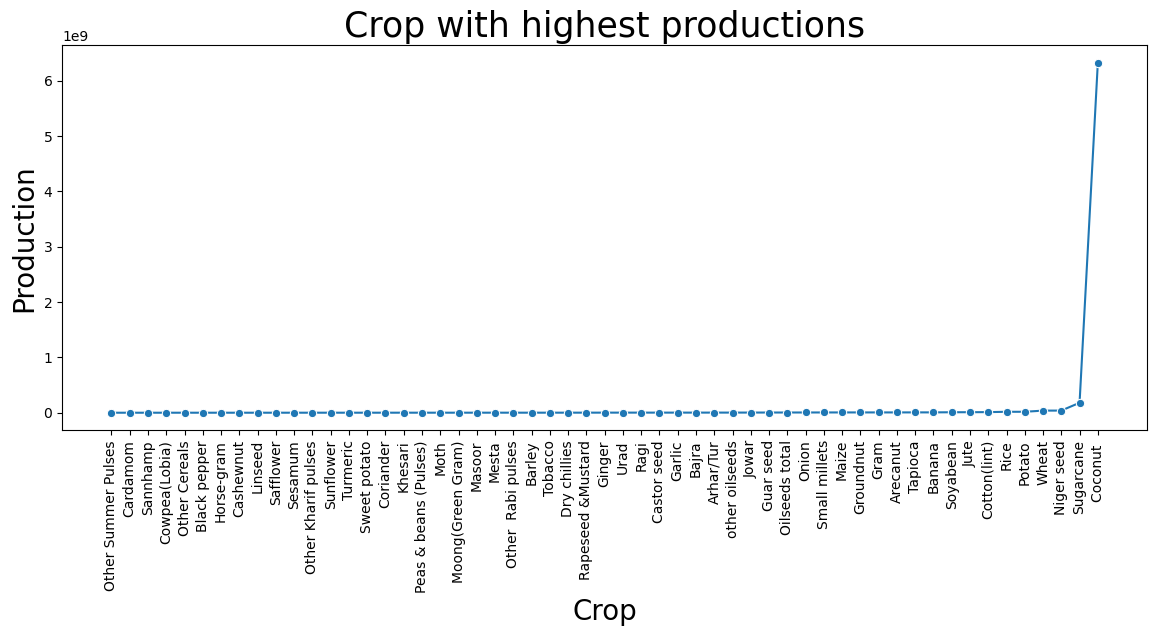

In [768]:
#Question 4. Which is the highest Productions yielding crop?

c=df.groupby('Crop')['Production'].max().reset_index()
crop=c.sort_values(by='Production',ascending=True)
plt.figure(figsize=(14,5))
sns.lineplot( x='Crop', y='Production', data=crop, palette='Spectral',marker='o')
plt.title('Crop with highest productions',fontsize=25)
plt.xlabel('Crop',fontsize=20)
plt.ylabel('Production',fontsize=20)
plt.xticks(rotation=90)
plt.show()

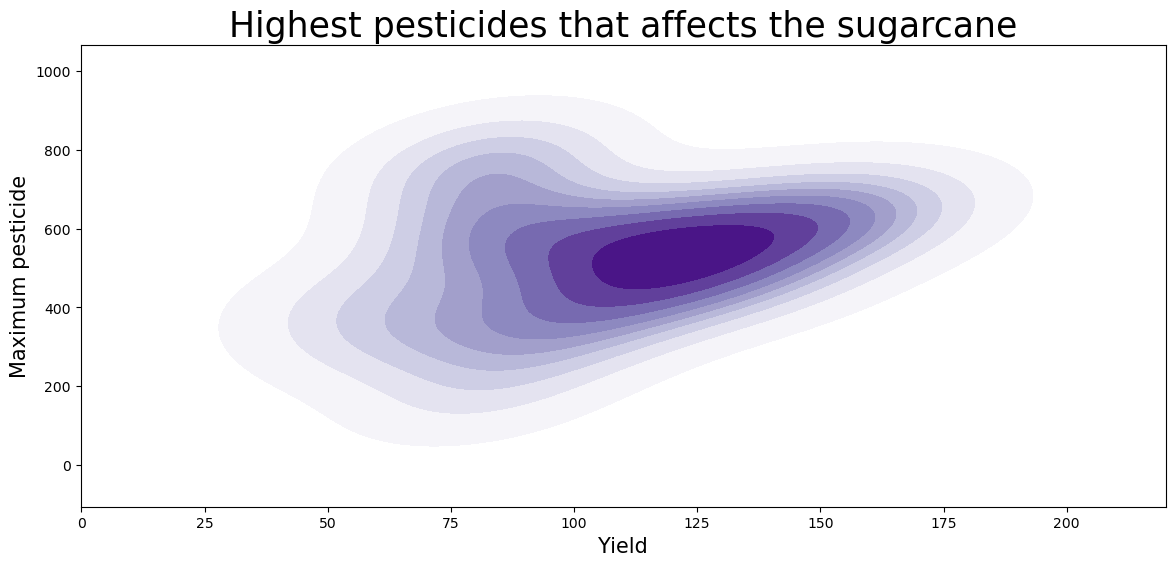

In [799]:
#Question 5. How highest pesticides affect the crop-Sugarcane and its yield in Puducherry ?

a=df.query("Crop=='Sugarcane' and State=='Puducherry'")
b=a.groupby('Yield')['Pesticide'].max().reset_index()
c=b.sort_values(by='Pesticide',ascending=True)
plt.figure(figsize=(14,6))
sns.kdeplot(x='Yield', y='Pesticide',data=c,cmap='Purples', shade=True)
plt.title('Highest pesticides that affects the sugarcane',fontsize=25)
plt.xlabel('Yield',fontsize=15)
plt.ylabel('Maximum pesticide',fontsize=15)
plt.show()

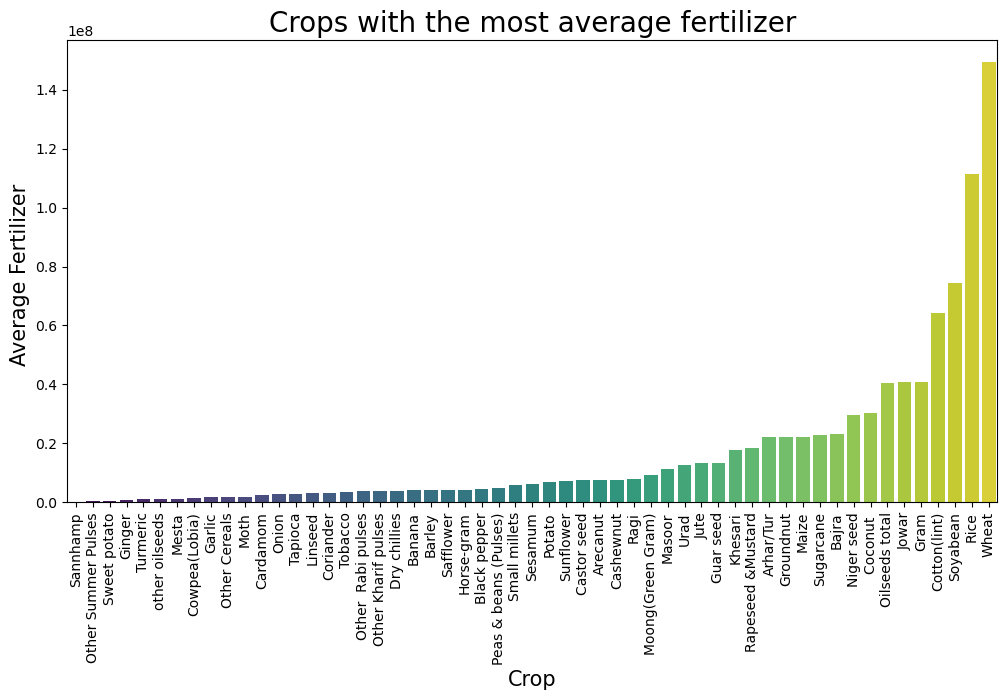

In [770]:
#Question 6. Which crops use the most fertilizer on average?

a = df.groupby('Crop')['Fertilizer'].mean().reset_index()
b = a.sort_values(by='Fertilizer', ascending=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Fertilizer', data=b , palette='viridis')
plt.title('Crops with the most average fertilizer', fontsize=20)
plt.xlabel('Crop', fontsize=15)
plt.ylabel('Average Fertilizer ', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Top 5 states with the highest average yield:
             State       Yield
6              Goa  354.780305
21      Puducherry  346.512837
13          Kerala  276.611148
29     West Bengal  266.898311
24      Tamil Nadu  226.050221
2            Assam  219.716345
0   Andhra Pradesh  181.465391
12       Karnataka  105.720578
25       Telangana   99.518206
5            Delhi   13.118670


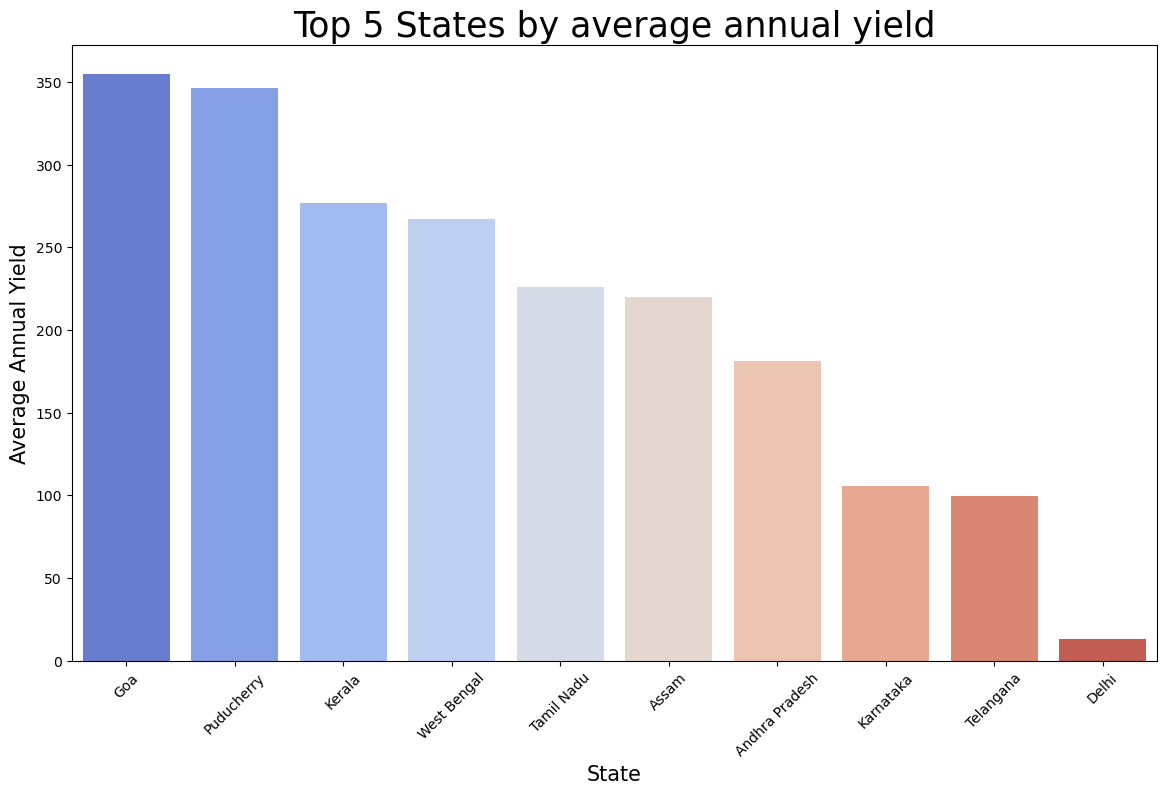

In [774]:
#Question 7. What are the top 5 states in terms of average annual yield across all crops?

a = df.groupby('State')['Yield'].mean().reset_index()
b = a.sort_values(by='Yield', ascending=False).head(10)
print("Top 5 states with the highest average yield:")
print(b)
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Yield', data=b, palette='coolwarm')
plt.title('Top 5 States by average annual yield', fontsize=25)
plt.xlabel('State', fontsize=15)
plt.ylabel('Average Annual Yield', fontsize=15)
plt.xticks(rotation=45)
plt.show()

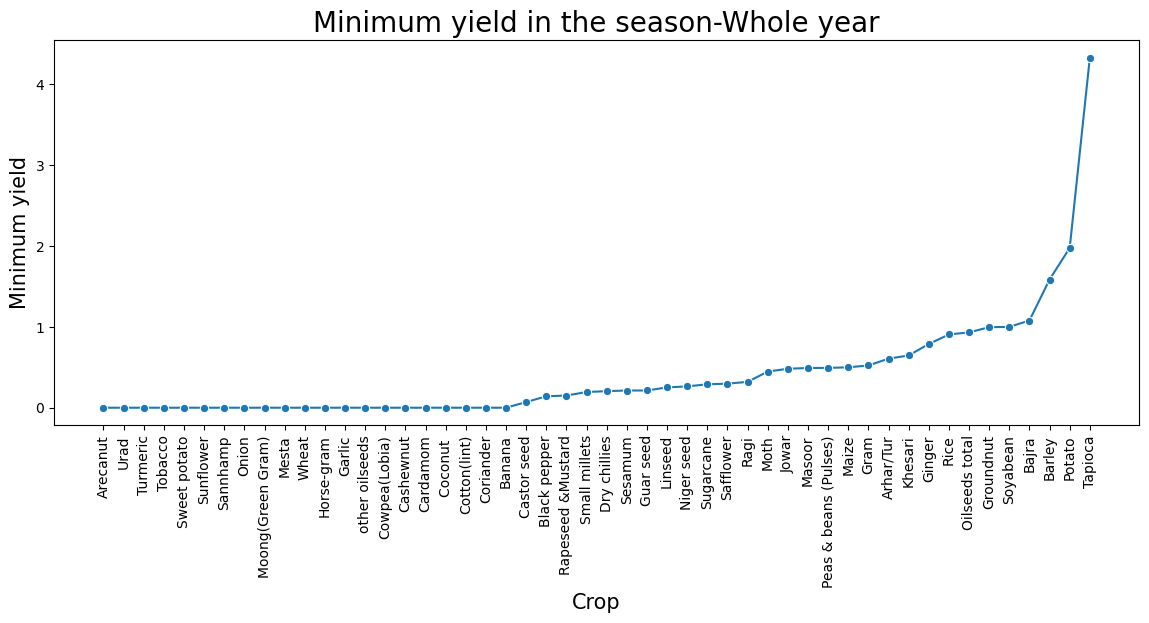

In [801]:
#Question 8. Which is the minimum yield crop in the season -whole year ?
 
a =df.query("Season=='Whole Year '")
b = a.groupby('Crop')['Yield'].min().reset_index()
c = b.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(14,5))
sns.lineplot(x='Crop', y='Yield', data=c, marker='o')
plt.title('Minimum yield in the season-Whole year',fontsize=20)
plt.xlabel('Crop',fontsize=15)
plt.ylabel('Minimum yield',fontsize=15)
plt.xticks(rotation=90)
plt.show()

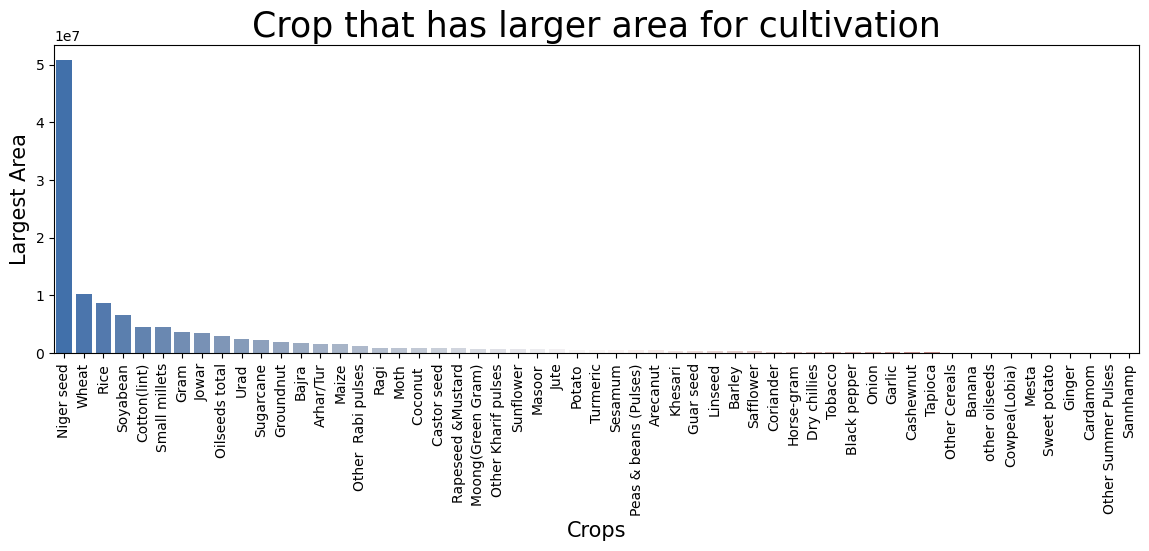

In [779]:
#Question 9. Which crop takes the largest area for cultivation?

a =df.groupby('Crop')['Area'].max().reset_index()
b=a.sort_values(by='Area',ascending=False)
plt.figure(figsize=(14,4))
sns.barplot(x='Crop', y='Area', data=b, palette='vlag')
plt.title('Crop that has larger area for cultivation',fontsize=25)
plt.xlabel('Crops',fontsize=15)
plt.ylabel('Largest Area',fontsize=15)
plt.xticks(rotation=90)
plt.show()

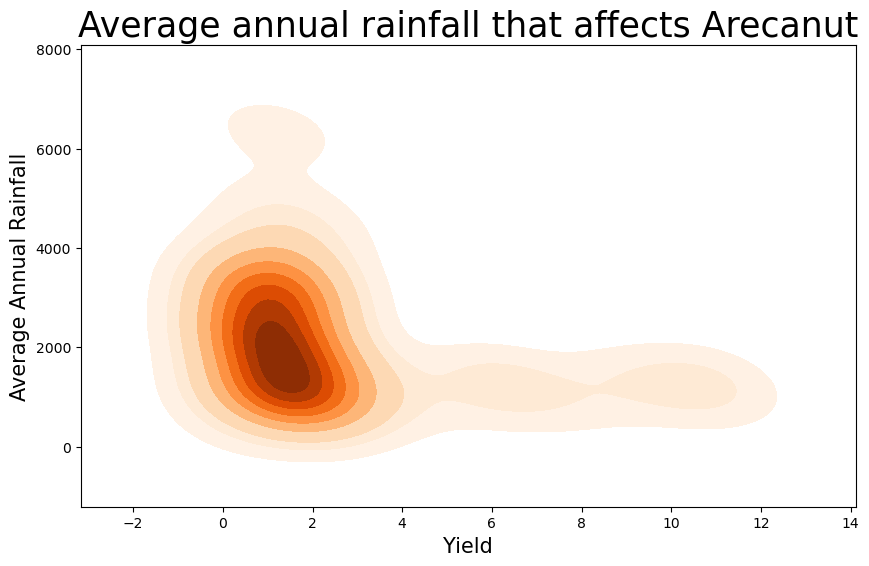

In [781]:
#Question 10. How yield can affect the average annual rainfall for the crop- Arecanut ?

a=df.query("Crop=='Arecanut'")
b =a.groupby('Yield')['Annual_Rainfall'].mean().reset_index()
c=b.sort_values(by='Annual_Rainfall',ascending=True)
plt.figure(figsize=(10,6))
sns.kdeplot(x='Yield', y='Annual_Rainfall', data=c, cmap='Oranges', shade=True)
plt.title('Average annual rainfall that affects Arecanut',fontsize=25)
plt.xlabel('Yield',fontsize=15)
plt.ylabel('Average Annual Rainfall',fontsize=15)
plt.show()

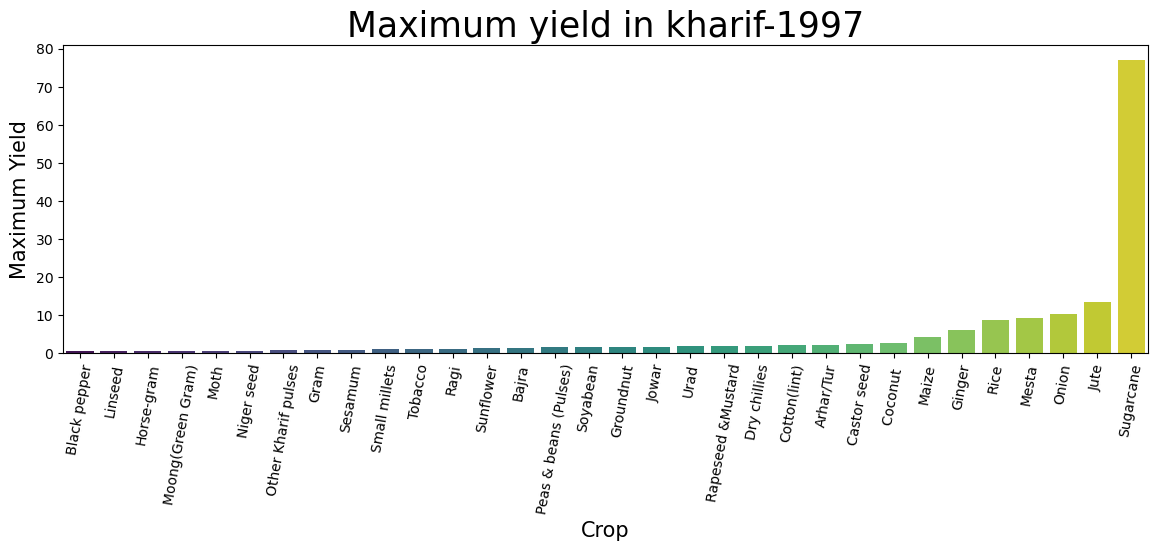

In [589]:
# Question 11. Which crop get maximum yield in the season- kharif and in the crop year-1997 ?

a=df.query("Crop_Year==1997 and Season=='Kharif     '")
b=a.groupby('Crop')['Yield'].max().reset_index()
c=b.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(14,4))
sns.barplot( x='Crop', y='Yield',data=c, palette='viridis')
plt.title('Maximum yield in kharif-1997',fontsize=25)
plt.xlabel('Crop',fontsize=15)
plt.ylabel('Maximum Yield',fontsize=15)
plt.xticks(rotation=80)
plt.show()

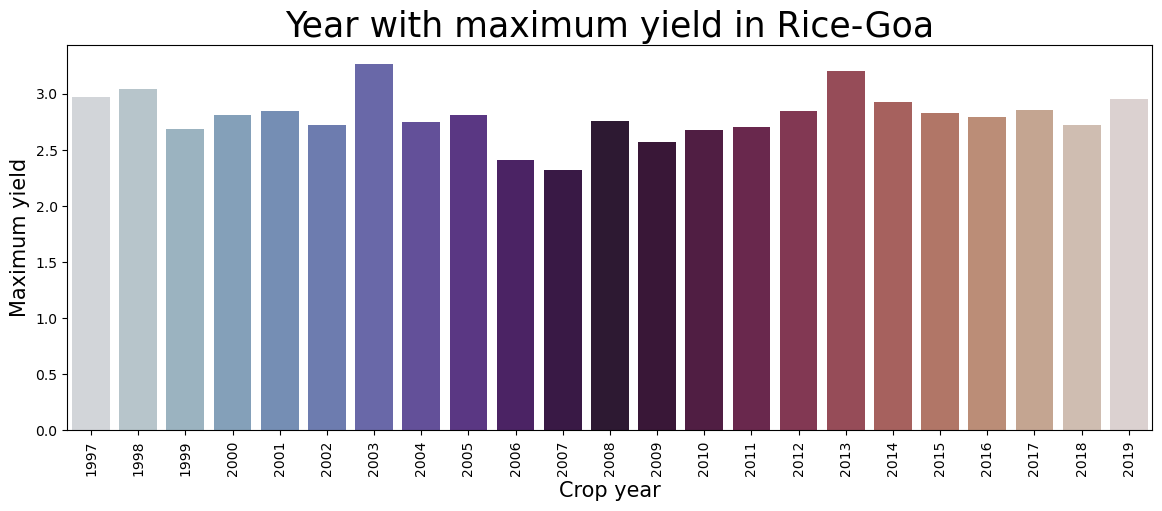

In [696]:
#Question 13. In which year maximun yield in the state-Goa and crop- Rice ?

a=df.query("State=='Goa' and Crop=='Rice'")
b=a.groupby('Crop_Year')['Yield'].max().reset_index()
c=b.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(14,5))
sns.barplot( x='Crop_Year', y='Yield', data=c, palette='twilight')
plt.title('Year with maximum yield in Rice-Goa',fontsize=25)
plt.xlabel('Crop year',fontsize=15)
plt.ylabel('Maximum yield',fontsize=15)
plt.xticks(rotation=90)
plt.show()

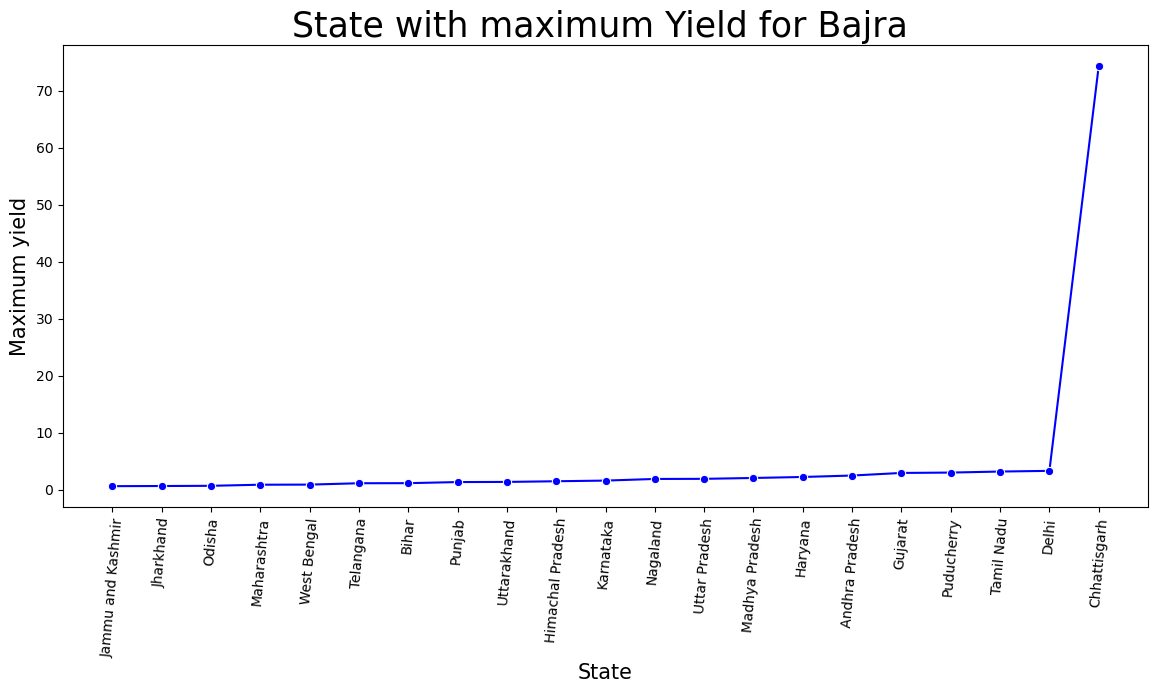

In [666]:
#Question 14. In which state maximun yield in the crop-Bajra ?

a=df.query("Crop=='Bajra'")
b=a.groupby('State')['Yield'].max().reset_index()
c=b.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(14,6))
sns.lineplot( x='State', y='Yield',data=c ,color='blue', marker='o')
plt.title('State with maximum yield for Bajra ',fontsize=25) 
plt.xlabel('State',fontsize=15)
plt.ylabel('Maximum yield',fontsize=15)
plt.xticks(rotation=85)
plt.show()

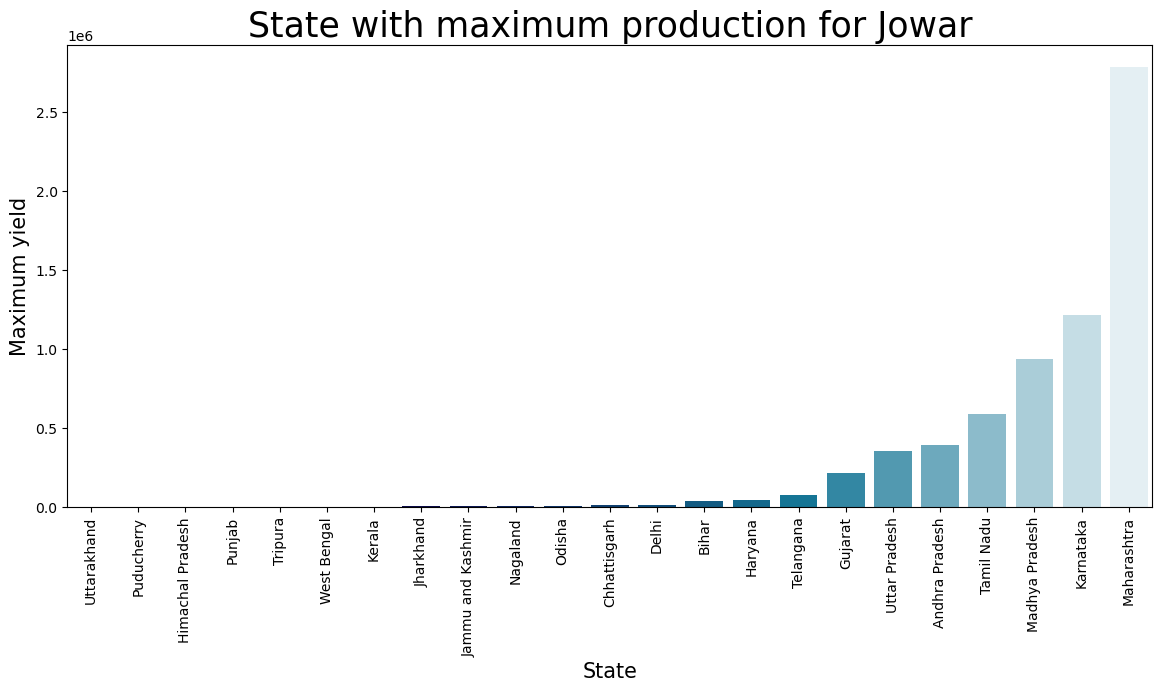

In [680]:
#Question 15. In which state maximun production in the crop-Jowar?

a=df.query("Crop=='Jowar'")
b=a.groupby('State')['Production'].max().reset_index()
c=b.sort_values(by='Production',ascending=True)
plt.figure(figsize=(14,6))
sns.barplot( x='State', y='Production',data=c, palette='ocean')
plt.title('State with maximum production for Jowar',fontsize=25) 
plt.xlabel('State',fontsize=15)
plt.ylabel('Maximum yield',fontsize=15)
plt.xticks(rotation=90)
plt.show()

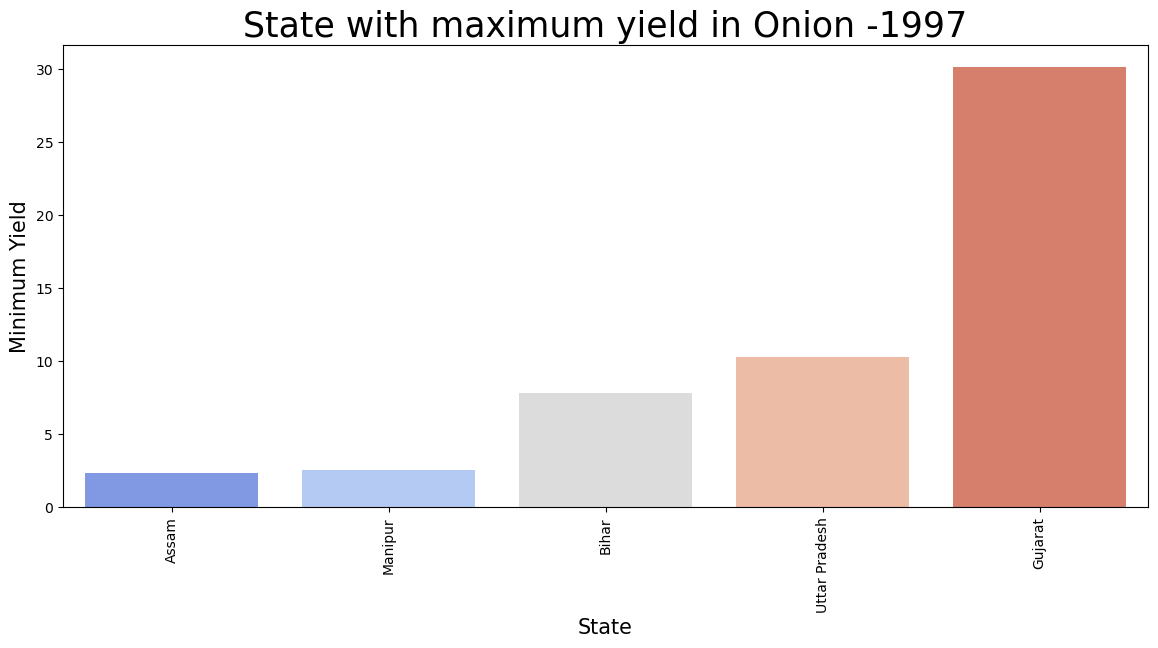

In [694]:
#Question 16. In which state maximum yield in the crop-Onion and crop year-1997 ?

a=df.query("Crop=='Onion' and Crop_Year==1997")
b=a.groupby('State')['Yield'].max().reset_index()
c=b.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(14,6))
sns.barplot( x='State', y='Yield',data=c,palette='coolwarm')
plt.title('State with maximum yield in Onion -1997',fontsize=25)
plt.xlabel('State',fontsize=15)
plt.ylabel('Maximum Yield',fontsize=15)
plt.xticks(rotation=90)
plt.show()

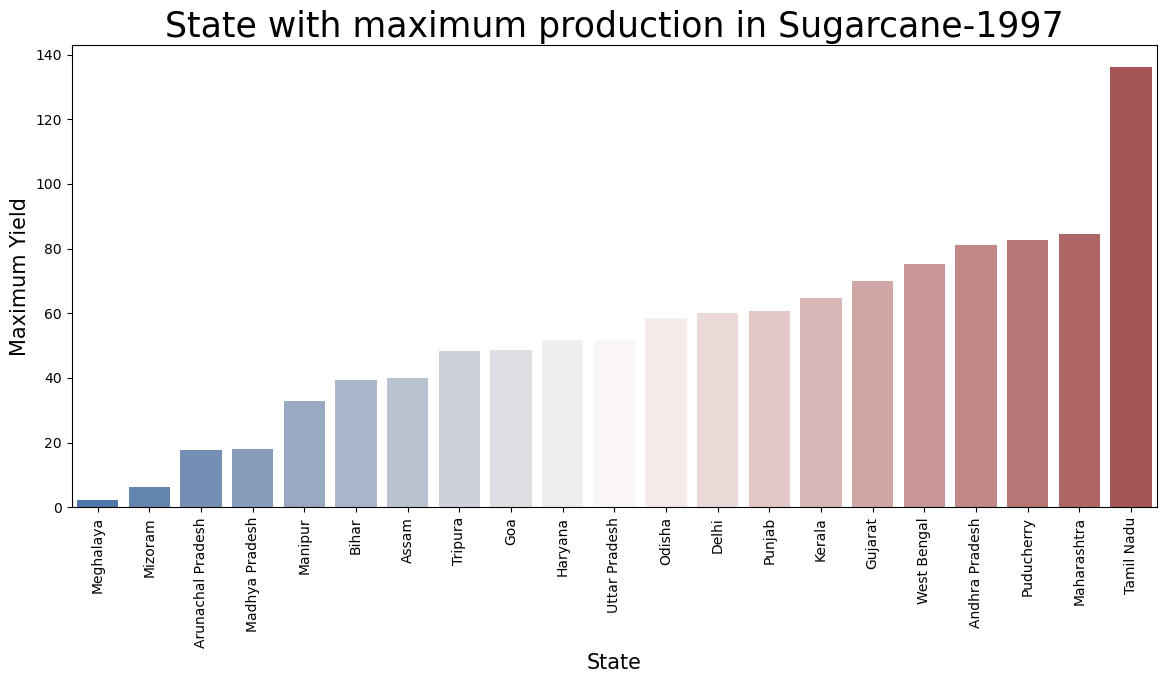

In [700]:
#Question 17. In which state maximum production in the crop-Sugarcane and crop year-1998 ?

a=df.query("Crop=='Sugarcane' and Crop_Year==1998")
b=a.groupby('State')['Yield'].max().reset_index()
c=b.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(14,6))
sns.barplot( x='State', y='Yield',data=c,palette='vlag')
plt.title('State with maximum production in Sugarcane-1997',fontsize=25)
plt.xlabel('State',fontsize=15)
plt.ylabel('Maximum Yield',fontsize=15)
plt.xticks(rotation=90)
plt.show()

                   Crop           Area
29            Sunflower       1.000000
35                Wheat       1.200000
27             Soyabean       3.750000
18                Onion      39.458571
32              Tobacco      42.108571
16                Maize      88.748250
14           Horse-gram      95.000000
17    Moong(Green Gram)     128.333333
26        Small millets     151.301000
10               Garlic     301.880500
9          Dry chillies     304.500000
34                 Urad     347.333333
20        Other Cereals     421.500000
30         Sweet potato     550.520500
22               Potato     617.988889
12                 Gram     645.430000
23                 Ragi     656.410000
1             Arhar/Tur     742.875000
25              Sesamum     769.337696
8         Cowpea(Lobia)     954.666667
19   Other  Rabi pulses    1256.000000
15                Jowar    1450.150000
21  Other Kharif pulses    1460.765200
13            Groundnut    2098.315000
36       other oilseeds  

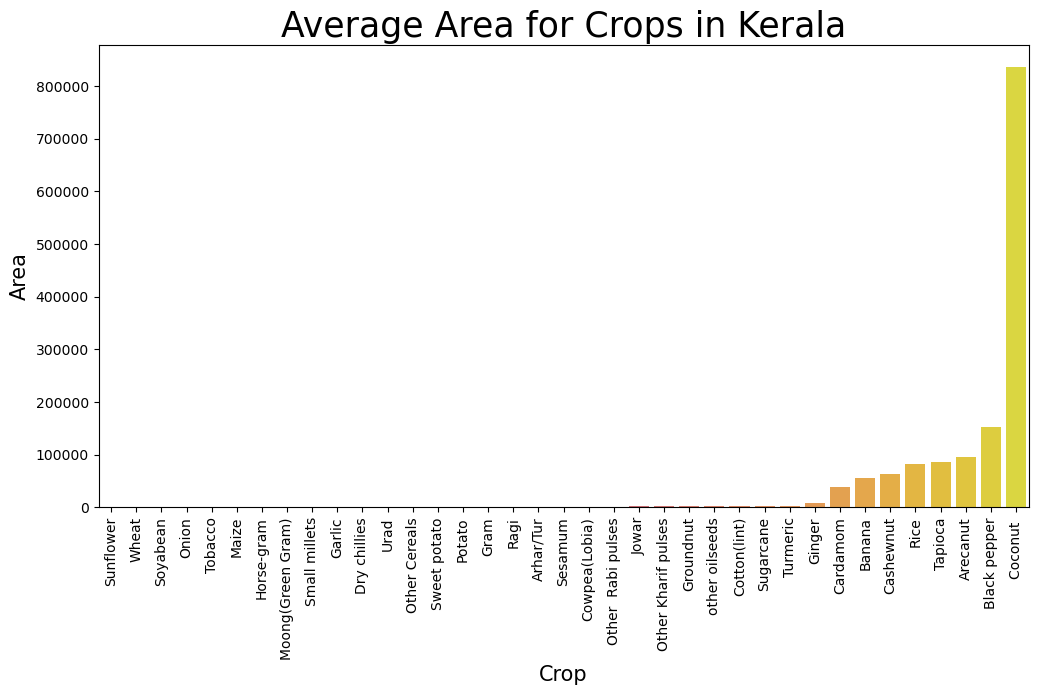

In [708]:
#Question 18. What is average area for cultivating the crops in Tamil Nadu ?

a=df.query("State=='Kerala'")
b=a.groupby('Crop')['Area'].mean().reset_index()
c=b.sort_values(by='Area',ascending=True)
print(c)
plt.figure(figsize=(12,6))
sns.barplot(data=c, x='Crop', y='Area', palette='plasma')
plt.title('Average Area for Crops in Kerala',fontsize=25)
plt.xlabel('Crop',fontsize=15)
plt.ylabel('Area',fontsize=15)
plt.xticks(rotation=90)
plt.show()

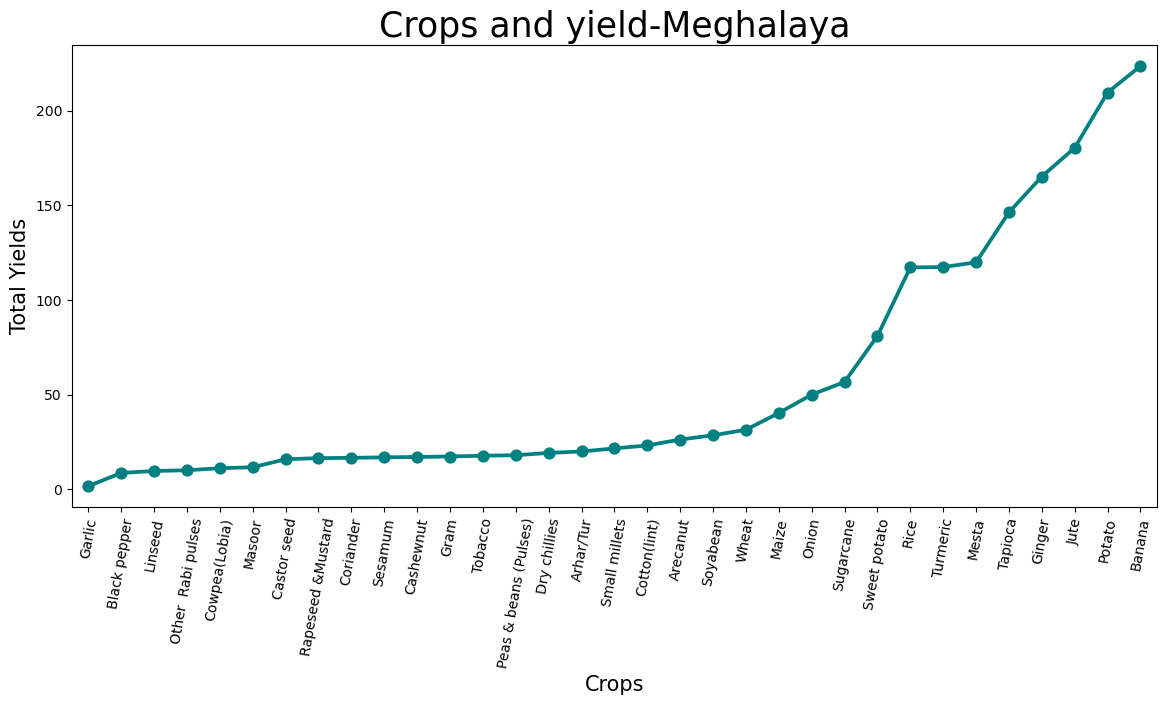

In [728]:
#Question 19. How many Crops are cultivated on Nagaland and yield for each crop?

a=df.query("State=='Meghalaya'")
b=a.groupby('Crop')['Yield'].sum().reset_index()
c=b.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(14,6))
sns.pointplot( x='Crop', y='Yield',data=c, color='teal', marker="o",linestyle="-")
plt.title('Crops and yield-Meghalaya',fontsize=25)
plt.xlabel('Crops',fontsize=15)
plt.ylabel('Total Yields',fontsize=15)
plt.xticks(rotation=80)
plt.show()

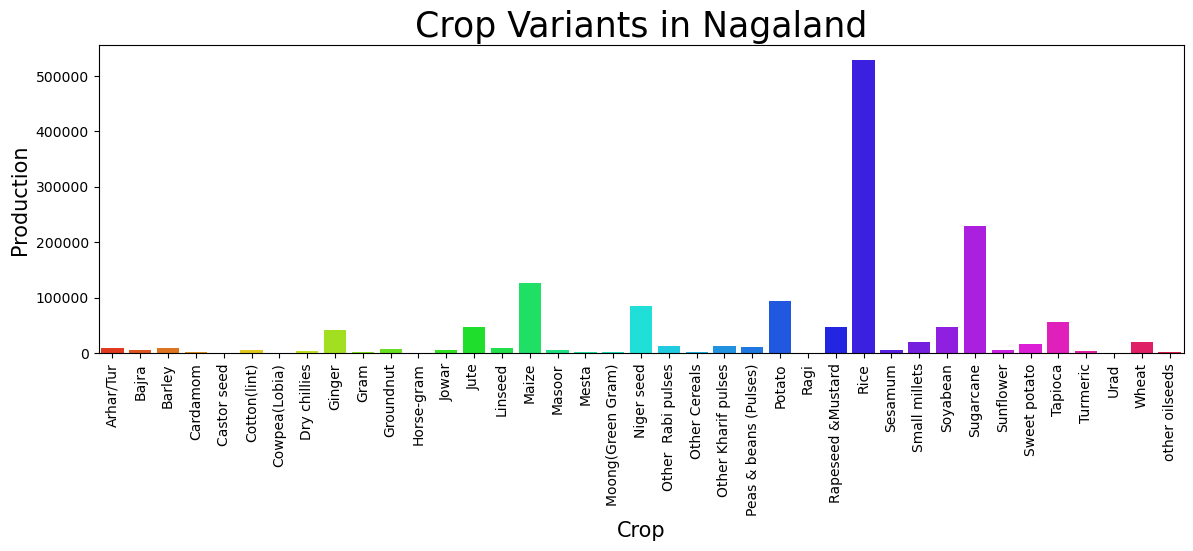

In [764]:
#Question 20. In Manipur how many variants of crops are cultivating and which crop gives maximum Production?

a=df.query("State=='Nagaland'")
b=a.groupby('Crop')['Production'].max().reset_index()
plt.figure(figsize=(14,4))
sns.barplot( x='Crop', y='Production',data=b, palette='hsv')
plt.title('Crop Variants in Nagaland',fontsize=25)
plt.xlabel('Crop',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.xticks(rotation=90)
plt.show()